In [7]:
import numpy as np
from numpy.fft import fft2, ifft2, rfft2, fftshift, ifftshift
from matplotlib import pyplot as plt

def gen_noise(slope, dim, whiten = False):
    #Create matrix of standard normal values
    n_samples = dim[0]*dim[1]
    noise = np.random.normal(0, 1, n_samples)
    noise = np.reshape(noise, dim)

    noise_fft = fftshift(fft2(noise))
    fft_dim = noise_fft.shape
    center = np.divide(fft_dim, 2)

    #Create distance bins for applying the filter, modify the multiplier on the second line to change granularity 
    max_dist = np.sqrt(np.sum(np.square(center)))
    n_bins = int(np.ceil(max_dist)) * 2
    bins = np.linspace(0, max_dist, n_bins)

    #Generate euclidean distance matrix 
    dist_matrix = np.zeros(fft_dim)
    x_sample = np.linspace(0, fft_dim[0], fft_dim[0])
    y_sample = np.linspace(0, fft_dim[1], fft_dim[1])
    x, y = np.meshgrid(y_sample, x_sample)
    
    x = np.absolute(x - center[1])
    y = np.absolute(y - center[0])
    dist_matrix = np.sqrt(x**2 + y**2)

    #Apply filter to each radial slice
    filtered_noise = np.zeros(fft_dim)
    for i in range(len((bins[0:-1]))):            
        filter = np.ones(fft_dim)
        filter[dist_matrix <= bins[i]] = 0
        filter[dist_matrix > bins[i+1]] = 0

        power = np.mean([bins[i], bins[i+1]])**(slope/2)
        filtered_noise = filtered_noise + noise_fft*(filter * power)
    
    filtered_noise = np.absolute(ifft2(ifftshift(filtered_noise)))
    return filtered_noise

In [3]:
def rotavg(data):
    center = np.divide(data.shape, 2)
    x_sample = np.linspace(0, data.shape[0], data.shape[0])
    y_sample = np.linspace(0, data.shape[1], data.shape[1])
    x, y = np.meshgrid(y_sample, x_sample)
    
    x = np.absolute(x - center[1])
    y = np.absolute(y - center[0])
    dist_matrix = np.sqrt(x**2 + y**2)

    max_dist = np.sqrt(np.sum(np.square(center)))
    n_bins = int(np.ceil(max_dist))
    bins = np.linspace(0, max_dist, n_bins)
    
    radialprofile = np.zeros(n_bins - 1)
    
    for i in range(len((bins[0:-1]))):
        filter = np.ones(data.shape)
        filter[dist_matrix <= bins[i]] = 0
        filter[dist_matrix > bins[i+1]] = 0
        
        radialprofile[i] = np.sum(filter * data) / np.sum(filter)
    
    return radialprofile

In [4]:
def imfft(image):
    imfft = fftshift(rfft2(image))
    impfft = np.absolute(imfft) ** 2
    pspec = rotavg(impfft)

    return pspec

def comp_slope(pspec):
    pspec = np.log(pspec)
    x = np.linspace(1, pspec.shape[0] / 2, pspec.shape[0])
    x = np.log(x)
    slope = np.polyfit(x, pspec, 1)[0]
    return slope


In [8]:
noise_0 = gen_noise(0, [500,500])
noise_2 = gen_noise(-2.5, [500,500])
noise_5 = gen_noise(-5, [500,500])

fft_0 = imfft(noise_0)
fft_2 = imfft(noise_2)
fft_5 = imfft(noise_5)

slope_0 = comp_slope(fft_0)
slope_2 = comp_slope(fft_2)
slope_5 = comp_slope(fft_5)

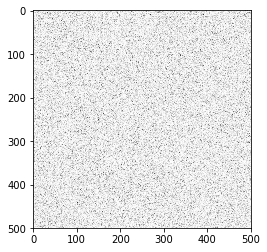

In [9]:
plt.imshow(noise_0, cmap = 'Greys')


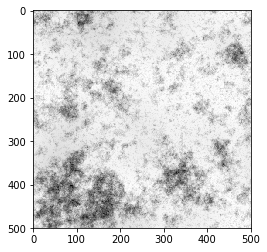

In [10]:
plt.imshow(noise_2, cmap = 'Greys')

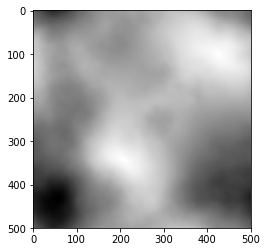

In [11]:
plt.imshow(noise_5, cmap = 'Greys')

In [12]:
slope_0

-0.2021013670496298

In [13]:
slope_2

-2.415843085944623

In [14]:
slope_5

-5.287652457580189